## Problem 1: Visualize a static map (8 points)

Create a static map using the skills you leared in [lesson 5: static maps](https://automating-gis-processes.github.io/site/notebooks/L5/static_maps.html). The map should contain multiple layers of data (at least two different data sets), and you should pay attention to the classification and visualization (colors, edges etc.) when creating the map. Write your code into a notebook file (`.ipynb`) or a python script file (`.py`) and store the output map(s) in `.png` format under the `docs` folder.

**Topic of the map:**
- You can either use the data sets we have already used during this course (eg. the Travel Time Matrix, or population grid), or you can select some other data set of your interest (for example, statistics in postal code areas).
- Feel free to adapt examples provided in this course! You can do further calculations based on the datasets or use the analysis outputs that we have done earlier in the course (for example, the dominance areas or travel times for shopping centers). 

**Criteria:**
- The map should have multiple layers on it
- The map should portay some kind of classification and/or an analysis output (not just the raw data).
- Consider [good cartographic practices](https://www.gislounge.com/ten-things-to-consider-when-making-a-map/) (map extent, zoom level, color choises, legend, credit data sources etc.)
- The map should demonstrate skills learned during [lesson 5: static maps](https://automating-gis-processes.github.io/site/notebooks/L5/static_maps.html) and throughout this course.

**Output:**
- Remember to commit the code and input data (or at least a link to input data)
- Save your map(s) as png image in the **`docs`** folder  

In [12]:
#load packages
import geopandas as gpd
from pyproj import CRS
import matplotlib.pyplot as plt
%matplotlib inline

# Filepaths
grid_fp = "data/dataE5/TravelTimes_to_5975375_RailwayStation.shp"
roads_fp = "data/dataE5/roads.shp"
metro_fp = "data/dataE5/metro.shp"
addresses_fp = "data/dataE5/addresses.shp"

# Read files
grid = gpd.read_file(grid_fp)
roads = gpd.read_file(roads_fp)
metro = gpd.read_file(metro_fp)
addresses = gpd.read_file(addresses_fp)

In [3]:
#print CRS:s
print(roads.crs)
print(metro.crs)
print(grid.crs)
print(addresses.crs)

{'init': 'epsg:2392'}
{'init': 'epsg:2392'}
{'init': 'epsg:3067'}
{'init': 'epsg:4326'}


In [4]:
# Reproject to ETRS89 based on the grid crs:
roads = roads.to_crs(crs=grid.crs)
metro = metro.to_crs(crs=grid.crs)
addresses = addresses.to_crs(crs=grid.crs)

In [5]:
#are they in the same coordinate system?
roads.crs == metro.crs == grid.crs == addresses.crs

True

In [6]:
roads.head()
metro.head()
addresses.head()
grid.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,geometry
0,32297,43,32260,48,5785640,32616,116,147,32616,108,139,5975375,32164,459,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,32508,43,32471,49,5785641,32822,119,145,32822,111,133,5975375,29547,422,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
2,30133,50,31872,56,5785642,32940,121,146,32940,113,133,5975375,29626,423,"POLYGON ((382500.000 6697750.000, 382250.000 6..."
3,32690,54,34429,60,5785643,33233,125,150,33233,117,144,5975375,29919,427,"POLYGON ((382750.000 6697750.000, 382500.000 6..."
4,31872,42,31834,48,5787544,32127,109,126,32127,101,121,5975375,31674,452,"POLYGON ((381250.000 6697500.000, 381000.000 6..."


In [7]:
# replace the no-data values
import numpy as np
len(grid)
cols = ["walk_d","geometry"]
grid[cols] = grid[cols].replace({'-1':np.nan, -1:np.nan})


#drop rows containing no-data values
grid.dropna(inplace=True)

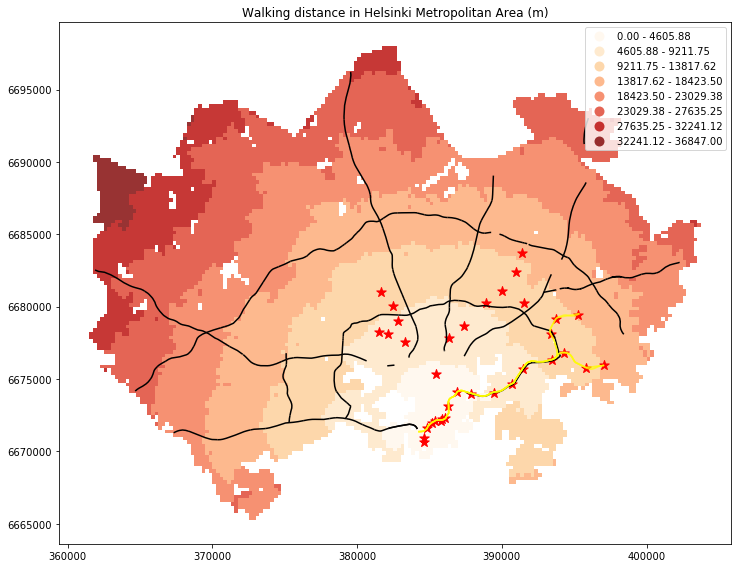

In [11]:
# For better control of the figure and axes, use the plt.subplots function before plotting the layers
# https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html#a-figure-with-just-one-subplot

# Control figure size in here
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Walking distance in Helsinki Metropolitan Area (m)')

# Visualize the travel times into 9 classes using "Quantiles" classification scheme
grid.plot(ax=ax, column="walk_d", linewidth=0.03, cmap="OrRd", scheme="equal_interval", k=8, alpha=0.8, legend=True)

# Add metro on top of the previous map
addresses.plot(ax=ax, marker='*', color="red",  markersize=100, legend=True)

# Add roads on top of the grid
# (use ax parameter to define the map on top of which the second items are plotted)
roads.plot(ax=ax, color="black", linewidth=1.5, legend=True)

# Add metro on top of the previous map
metro.plot(ax=ax, color="yellow", linewidth=1.5, alpha=0.3, legend=True)

# Remove the empty white-space around the axes
plt.tight_layout()

# Save the figure as png file with resolution of 300 dpi
outfp = "docs/map1.png"
plt.savefig(outfp, dpi=500)
